In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 


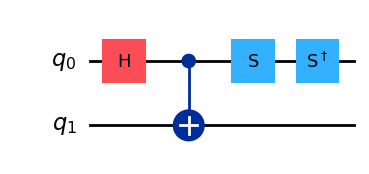

In [8]:
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# cổng S
qc.s(0)

#cổng Sdg
qc.sdg(0)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

In [3]:
# Set up six different observables.
from qiskit.quantum_info import SparsePauliOp
 
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

In [9]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
# Initialize account.
service = QiskitRuntimeService()
 
# Prepare inputs.
psi = RealAmplitudes(num_qubits=2, reps=2)
H1 = SparsePauliOp.from_list([("II", 1), ("IZ", 2), ("XI", 3)])
theta = [0, 1, 1, 2, 3, 5]
# Bell Circuit
qr = QuantumRegister(2, name="qr")
cr = ClassicalRegister(2, name="cr")
qc = QuantumCircuit(qr, cr, name="bell")
qc.h(qr[0])
qc.cx(qr[0], qr[1])
qc.measure(qr, cr)
 
backend = service.least_busy(operational=True, simulator=False)
pm = generate_preset_pass_manager(target=backend.target, optimization_level=1)
 
bell_isa_circuit = pm.run(qc)
psi_isa_circuit = pm.run(psi)
isa_observables = H1.apply_layout(psi_isa_circuit.layout)
 
with Session(service=service, backend=backend) as session:
    # Submit a request to the Sampler primitive within the session.
    sampler = Sampler(session=session)
    job = sampler.run([bell_isa_circuit])
    pub_result = job.result()[0]
    print(f"Counts: {pub_result.data.cr.get_counts()}")
 
    # Submit a request to the Estimator primitive within the session.
    estimator = Estimator(session=session)
    estimator.options.resilience_level = 1  # Set options.
    job = estimator.run(
        [(psi_isa_circuit, isa_observables, theta)]
    )
    pub_result = job.result()[0]
    print(f"Expectation values: {pub_result.data.evs}")

AccountNotFoundError: 'Unable to find account.'

In [10]:
from qiskit_aer import AerSimulator
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
from qiskit_ibm_runtime import Session
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
 
# Bell Circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
 
# Run the sampler job locally using FakeManilaV2
fake_manila = FakeManilaV2()
pm = generate_preset_pass_manager(backend=fake_manila, optimization_level=1)
isa_qc = pm.run(qc)
sampler = Sampler(backend=fake_manila)
result = sampler.run([isa_qc]).result()
 
# Run the sampler job locally using AerSimulator.
# Session syntax is supported but ignored.
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(qc)
with Session(backend=aer_sim) as session:
    sampler = Sampler(session=session)
    result = sampler.run([isa_qc]).result()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8772\2679756135.py:21: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler = Sampler(backend=fake_manila)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8772\2679756135.py:30: DeprecationWarning: The 'session' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler = Sampler(session=session)
